In [9]:
import numpy as np
import scipy.stats as stat
import matplotlib.pyplot as plt 

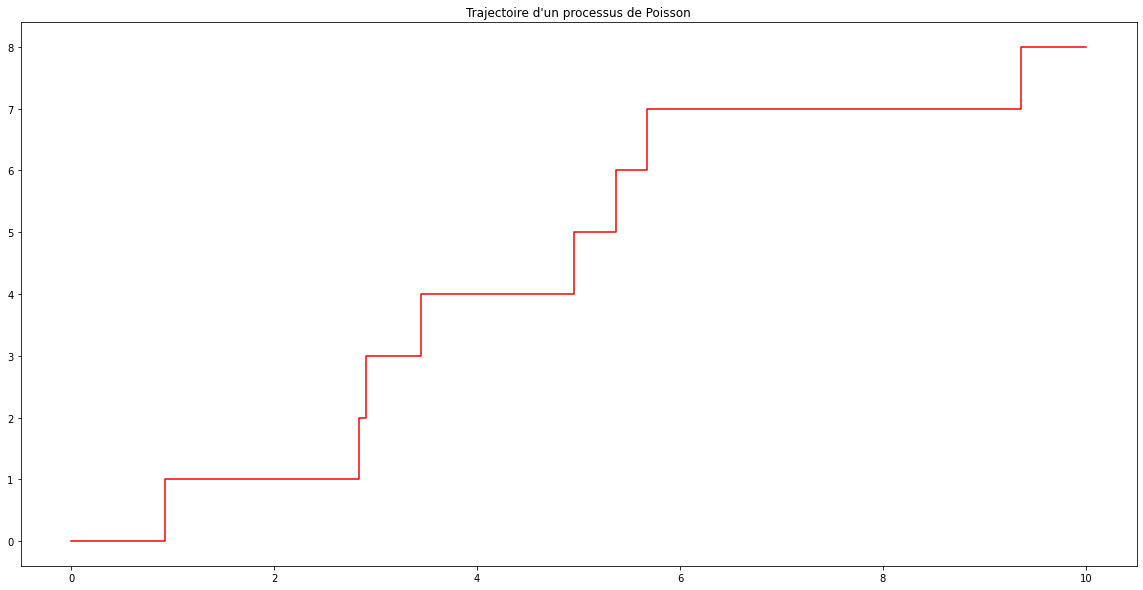

In [26]:
#simulation d'une trjaectoitre 
def trajectoire_poisson(t,l):
    Nt=stat.poisson.rvs(l*t,loc=1,size=1) # on tire la valeur de N_t
    temps_saut=np.sort(stat.uniform.rvs(loc=0,scale=t,size=Nt)) # les temps de saut sont obtenus en triant N_t variables uniformes sur [0,t]
    return temps_saut


t=10 # temps final de la simulation
l=1 # intensité du processus
trajectoire=trajectoire_poisson(t,l)
n=len(trajectoire)

# on trace la courbe et on ajoute 0 au début des temps de saut et t à la fin
trajectoire=np.concatenate((np.array([0]),trajectoire))
trajectoire=np.append(trajectoire,t)
plt.figure(figsize=(20,10))
plt.step(trajectoire,np.append(np.arange(n+1),n),where='post',color="red")
plt.title("Trajectoire d'un processus de Poisson");


In [46]:
#Estimation de lambda
def estim(ts,t):
    n=len(ts)
    T=ts[0]
    a=np.linspace(0,T,10)
    b=np.zeros(10)
    for i in range(1,n):
        T=ts[i]
        a=np.append(a,np.linspace(ts[i-1],ts[i],10))
        b=np.append(b,i/np.linspace(ts[i-1],ts[i],10))
    a=np.append(a,np.linspace(ts[n-1],t,10))
    b=np.append(b,n/np.linspace(ts[n-1],t,10))
    return (a,b)


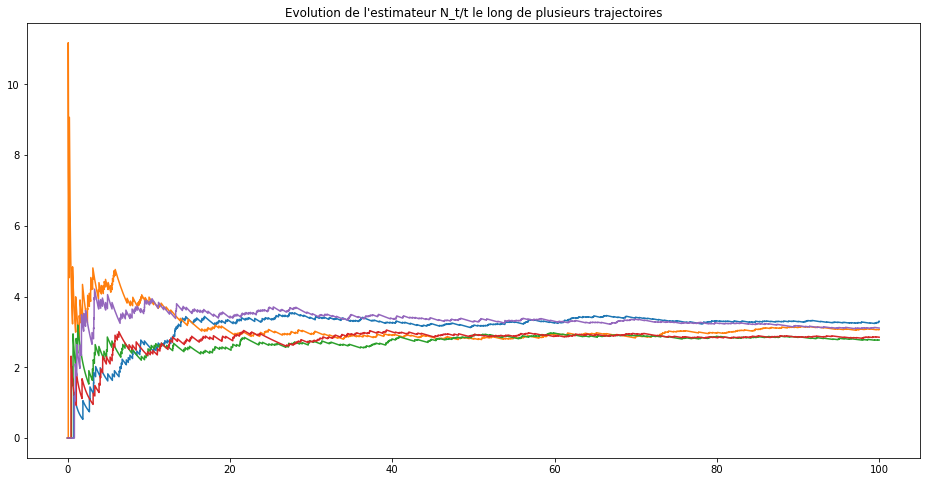

In [53]:
t=100
l=3
plt.figure(figsize=(16,8))
for i in range(5):
    temps_saut=trajectoire_poisson(t,l)
    a,b=estim(temps_saut,t)
    plt.plot(a,b)
plt.title("Evolution de l'estimateur N_t/t le long de plusieurs trajectoires");


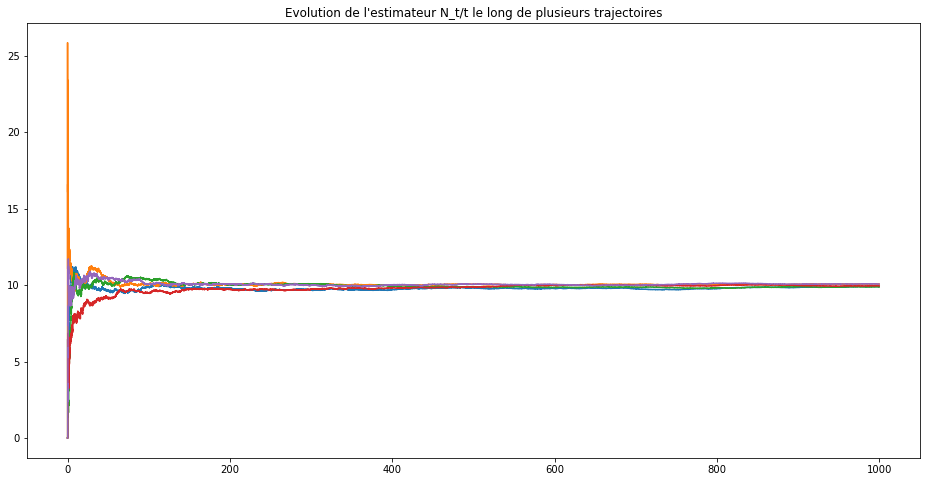

In [54]:
t=1000
l=10
plt.figure(figsize=(16,8))
for i in range(5):
    temps_saut=trajectoire_poisson(t,l)
    a,b=estim(temps_saut,t)
    plt.plot(a,b)
plt.title("Evolution de l'estimateur N_t/t le long de plusieurs trajectoires");


In [43]:
#IC
K=1000
t=100
l=3
estim=stat.poisson.rvs(l*t,loc=0,size=K)/t
borne_inf=estim-1.96*np.sqrt(estim/t)
borne_sup=estim+1.96*np.sqrt(estim/t)
niveau_estime=np.mean((borne_inf<l)*(l<borne_sup))
print(niveau_estime)

0.95
